# YipitData OA(Hao Yang)

## Data multiplication, Data Cleaning

### Part of sales data

In [108]:
import pandas as pd
import numpy as np

In [109]:
#Remove the dollor sign and all the white spaces
#Also remove the comma in order to convert string to int
sales = pd.read_csv('../Sales_Data.csv', converters={'Revenue': lambda x: x.replace('$','').replace(' ','').replace(',','')})

In [110]:
#Convert the data type of revenue column to float
sales['Revenue'] = pd.to_numeric(df['Revenue'])
sales.dtypes

Date             object
Revenue         float64
Product Line     object
dtype: object

In [111]:
sales.head()

,Date,Revenue,Product Line
0,1/1/2015,108632.40,Cars.go.com
1,1/1/2015,31494.02,Planes.go.com
2,1/1/2015,239376.48,Boats.go.com
3,1/2/2015,552064.80,Cars.go.com
4,1/2/2015,238344.12,Planes.go.com


In [184]:
sales_1q15 = sales.groupby('Product Line', as_index=False).agg('sum')
sales_1q15 = pd.concat([sales_1q15,pd.DataFrame({'Product Line':'Total', 'Revenue':sales_1q15['Revenue'].sum()},index=[0])],ignore_index=True)
date_1q15 = ['Q1 2015','Q1 2015','Q1 2015','Q1 2015']
sales_1q15.insert(1, 'date', date_1q15)
sales_1q15

,Product Line,date,Revenue
0,Boats.go.com,Q1 2015,4736347.68
1,Cars.go.com,Q1 2015,16757524.80
2,Planes.go.com,Q1 2015,32529742.79
3,Total,Q1 2015,54023615.27


### part of revenue data

In [112]:
#cleaning
historical = pd.read_csv('../Historical_Data.csv', converters={1: lambda x: x.replace('$','').replace(' ','').replace(',',''),
                                                               2: lambda x: x.replace('$','').replace(' ','').replace(',',''),
                                                               3: lambda x: x.replace('$','').replace(' ','').replace(',',''),
                                                               4: lambda x: x.replace('$','').replace(' ','').replace(',',''),
                                                               5: lambda x: x.replace('$','').replace(' ','').replace(',',''),})

In [113]:
#rearrange, fix column name
revenue = historical[0:5]
revenue = revenue.rename(columns={'Unnamed: 0':'Product Line'})
revenue = revenue.drop(0)
revenue = revenue.melt(id_vars=['Product Line'], value_vars=['Q4 2013', 'Q1 2014', 'Q2 2014', 'Q3 2014', 'Q4 2014'])
revenue = revenue.rename(columns={'variable':'date', 'value':'Revenue'})
revenue.head()

,Product Line,date,Revenue
0,Cars.go.com,Q4 2013,6085063.00
1,Planes.go.com,Q4 2013,32339403.00
2,Boats.go.com,Q4 2013,4329578.00
3,Total,Q4 2013,42754044.00
4,Cars.go.com,Q1 2014,5663582.00


In [114]:
revenue['Revenue'] = pd.to_numeric(revenue['Revenue'])
revenue.dtypes

Product Line     object
date             object
Revenue         float64
dtype: object

### part of profit data

In [115]:
profit = historical[8:12]
profit = profit.rename(columns={'Unnamed: 0':'Product Line'})
profit = profit.melt(id_vars=['Product Line'], value_vars=['Q4 2013', 'Q1 2014', 'Q2 2014', 'Q3 2014', 'Q4 2014'])
profit = profit.rename(columns={'variable':'date', 'value':'Profit'})
profit.head()

,Product Line,date,Profit
0,Cars.go.com,Q4 2013,1217012.60
1,Planes.go.com,Q4 2013,161697.02
2,Boats.go.com,Q4 2013,86591.56
3,Total,Q4 2013,1465301.18
4,Cars.go.com,Q1 2014,1132716.40


In [116]:
profit['Profit'] = pd.to_numeric(profit['Profit'])
profit.dtypes

Product Line     object
date             object
Profit          float64
dtype: object

### merge historical data

In [117]:
historical_new = revenue.merge(profit, left_on=['Product Line','date'], right_on=['Product Line','date'], how='inner')
historical_new.head()

,Product Line,date,Revenue,Profit
0,Cars.go.com,Q4 2013,6085063.0,1217012.60
1,Planes.go.com,Q4 2013,32339403.0,161697.02
2,Boats.go.com,Q4 2013,4329578.0,86591.56
3,Total,Q4 2013,42754044.0,1465301.18
4,Cars.go.com,Q1 2014,5663582.0,1132716.40


## Seaborn Line chart(to see if there exists turning point or not)

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Revenue&Profit Line chart(Carsgo)

In [119]:
#filter the carsgo data
carsgo = historical_new[historical_new['Product Line']=='Cars.go.com']
carsgo

,Product Line,date,Revenue,Profit
0,Cars.go.com,Q4 2013,6085063.0,1217012.6
4,Cars.go.com,Q1 2014,5663582.0,1132716.4
8,Cars.go.com,Q2 2014,5701994.0,1140398.8
12,Cars.go.com,Q3 2014,5691910.0,1138382.0
16,Cars.go.com,Q4 2014,5906352.0,1181270.4


[Text(0, 0.5, '')]

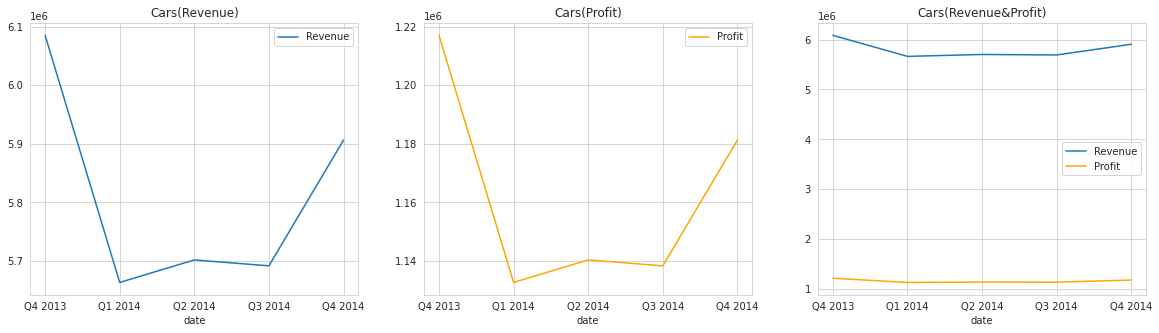

In [148]:
fig, ax = plt.subplots(figsize=(20,5),ncols=3)
sns.lineplot(carsgo.date, carsgo.Revenue, label='Revenue', ax=ax[0]).set(title='Cars(Revenue)', ylabel=None)
sns.lineplot(carsgo.date, carsgo.Profit, label='Profit', color='orange', ax=ax[1]).set(title='Cars(Profit)', ylabel=None)
sns.lineplot(carsgo.date, carsgo.Revenue, label='Revenue', ax=ax[2]).set(title='Cars(Revenue&Profit)', ylabel=None)
sns.lineplot(carsgo.date, carsgo.Profit, label='Profit', color='orange', ax=ax[2]).set(ylabel=None)

### Revenue&Profit Line chart(Planesgo) 

In [121]:
#filter the carsgo data
planesgo = historical_new[historical_new['Product Line']=='Planes.go.com']
planesgo

,Product Line,date,Revenue,Profit
1,Planes.go.com,Q4 2013,32339403.0,161697.02
5,Planes.go.com,Q1 2014,34861524.0,174307.62
9,Planes.go.com,Q2 2014,36039564.0,180197.82
13,Planes.go.com,Q3 2014,34422242.0,172111.21
17,Planes.go.com,Q4 2014,45337642.0,226688.21


[Text(0, 0.5, '')]

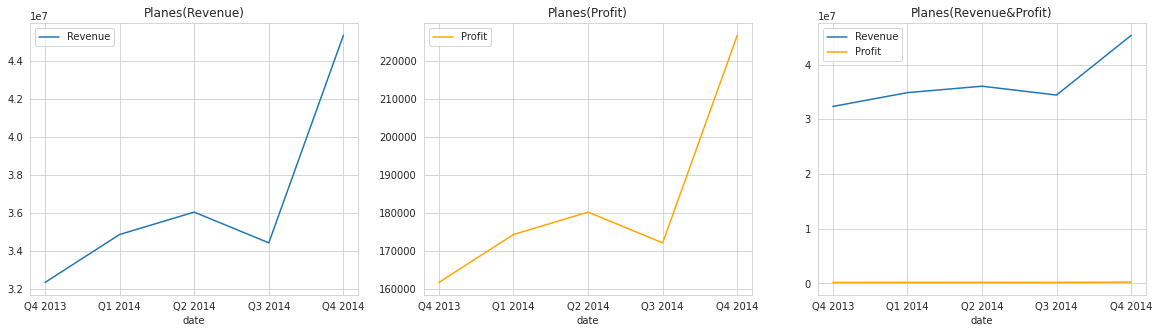

In [149]:
fig, ax = plt.subplots(figsize=(20,5),ncols=3)
sns.lineplot(planesgo.date, planesgo.Revenue, label='Revenue', ax=ax[0]).set(title='Planes(Revenue)', ylabel=None)
sns.lineplot(planesgo.date, planesgo.Profit, label='Profit', color='orange', ax=ax[1]).set(title='Planes(Profit)',ylabel=None)
sns.lineplot(planesgo.date, planesgo.Revenue, label='Revenue', ax=ax[2]).set(title='Planes(Revenue&Profit)', ylabel=None)
sns.lineplot(planesgo.date, planesgo.Profit, label='Profit', color='orange', ax=ax[2]).set(ylabel=None)

### Revenue&Profit Line chart(Boatsgo) 

In [123]:
#filter the carsgo data
boatsgo = historical_new[historical_new['Product Line']=='Boats.go.com']
boatsgo

,Product Line,date,Revenue,Profit
2,Boats.go.com,Q4 2013,4329578.0,86591.56
6,Boats.go.com,Q1 2014,4418088.0,88361.76
10,Boats.go.com,Q2 2014,4657184.0,93143.68
14,Boats.go.com,Q3 2014,4597765.0,91955.30
18,Boats.go.com,Q4 2014,5437214.0,108744.28


[Text(0, 0.5, '')]

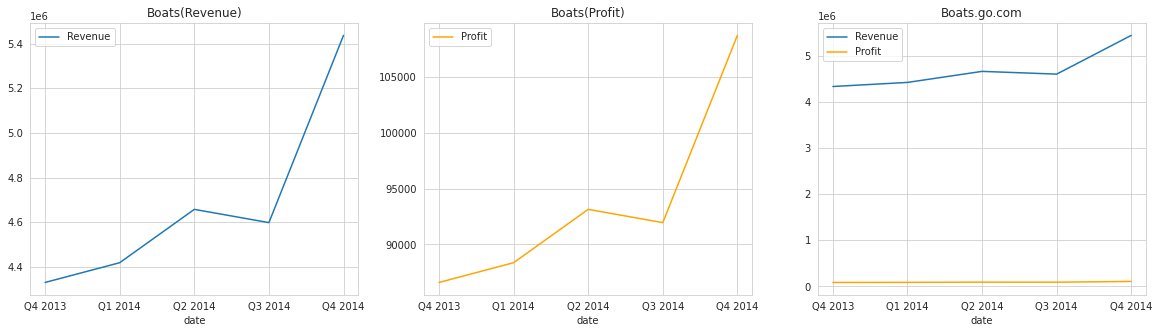

In [153]:
fig, ax = plt.subplots(figsize=(20,5), ncols=3)
sns.lineplot(boatsgo.date, boatsgo.Revenue, label='Revenue', ax=ax[0]).set(title='Boats(Revenue)', ylabel=None)
sns.lineplot(boatsgo.date, boatsgo.Profit, label='Profit', color='orange', ax=ax[1]).set(title='Boats(Profit)', ylabel=None)
sns.lineplot(boatsgo.date, boatsgo.Revenue, label='Revenue', ax=ax[2]).set(title='Boats.go.com', ylabel=None)
sns.lineplot(boatsgo.date, boatsgo.Profit, label='Profit', color='orange', ax=ax[2]).set(ylabel=None)

### Conclusion

From the charts above, we can clearly see that the rate of change between each quarter is almost the same in these three product lines. So, I figure out two ways to predict the 1q15 profit:<br>


1.   Based on the 1q15 revenue data, calculate the rate of change from Q4 2014 to Q1 2015 in these three product lines, then use this rate of change to calculate the profit of Q1 2015
2.   List item



## Calculate rate of change

In [185]:
df_roc = pd.concat([revenue,sales_1q15], ignore_index=True)
df_roc

,Product Line,date,Revenue
0,Cars.go.com,Q4 2013,6085063.00
1,Planes.go.com,Q4 2013,32339403.00
2,Boats.go.com,Q4 2013,4329578.00
3,Total,Q4 2013,42754044.00
4,Cars.go.com,Q1 2014,5663582.00
5,Planes.go.com,Q1 2014,34861524.00
6,Boats.go.com,Q1 2014,4418088.00
7,Total,Q1 2014,44943194.00
8,Cars.go.com,Q2 2014,5701994.00
9,Planes.go.com,Q2 2014,36039564.00


### Cars.go.com 1q15 Profit

In [250]:
#concat and filter the data
cars_roc = df_roc[df_roc['Product Line']=='Cars.go.com']
cars_roc = cars_roc[df_roc['date'].isin(['Q4 2014','Q1 2015'])]
cars_roc

,Product Line,date,Revenue
16,Cars.go.com,Q4 2014,5906352.0
21,Cars.go.com,Q1 2015,16757524.8


In [251]:
cars_roc['Change'] = cars_roc['Revenue'].pct_change()
cars_roc

,Product Line,date,Revenue,Change
16,Cars.go.com,Q4 2014,5906352.0,NaN
21,Cars.go.com,Q1 2015,16757524.8,1.837204


In [252]:
profit_roc = profit[profit['Product Line']=='Cars.go.com']
profit_roc = profit_roc[profit_roc['date']=='Q4 2014']
profit_4q14 = profit_roc['Profit'][16]
profit_roc = profit_roc.append(pd.DataFrame({'Product Line':'Cars.go.com', 
                                             'date':'Q1 2015', 
                                             'Profit':profit_4q14+profit_4q14*cars_roc['Change'][21]},index=[0]))
profit_roc

,Product Line,date,Profit
16,Cars.go.com,Q4 2014,1181270.40
0,Cars.go.com,Q1 2015,3351504.96


### Planes.go.com 1q15 Profit

In [254]:
planes_roc = df_roc[df_roc['Product Line']=='Planes.go.com']
planes_roc = planes_roc[df_roc['date'].isin(['Q4 2014','Q1 2015'])]
planes_roc

,Product Line,date,Revenue
17,Planes.go.com,Q4 2014,45337642.00
22,Planes.go.com,Q1 2015,32529742.79


In [255]:
planes_roc['Change'] = planes_roc['Revenue'].pct_change()
planes_roc

,Product Line,date,Revenue,Change
17,Planes.go.com,Q4 2014,45337642.00,NaN
22,Planes.go.com,Q1 2015,32529742.79,-0.2825


In [256]:
profit_roc_p = profit[profit['Product Line']=='Planes.go.com']
profit_roc_p = profit_roc_p[profit_roc_p['date']=='Q4 2014']
profit_4q14_p = profit_roc_p['Profit'][17]
profit_roc_p = profit_roc_p.append(pd.DataFrame({'Product Line':'Planes.go.com', 
                                             'date':'Q1 2015', 
                                             'Profit':profit_4q14_p+profit_4q14_p*planes_roc['Change'][22]},index=[0]))
profit_roc_p

,Product Line,date,Profit
17,Planes.go.com,Q4 2014,226688.21000
0,Planes.go.com,Q1 2015,162648.71395


### Boats.go.com 1q15 Profit

In [257]:
boats_roc = df_roc[df_roc['Product Line']=='Boats.go.com']
boats_roc = boats_roc[df_roc['date'].isin(['Q4 2014','Q1 2015'])]
boats_roc

,Product Line,date,Revenue
18,Boats.go.com,Q4 2014,5437214.00
20,Boats.go.com,Q1 2015,4736347.68


In [258]:
boats_roc['Change'] = boats_roc['Revenue'].pct_change()
boats_roc

,Product Line,date,Revenue,Change
18,Boats.go.com,Q4 2014,5437214.00,NaN
20,Boats.go.com,Q1 2015,4736347.68,-0.128902


In [259]:
profit_roc_b = profit[profit['Product Line']=='Boats.go.com']
profit_roc_b = profit_roc_b[profit_roc_b['date']=='Q4 2014']
profit_4q14_b = profit_roc_b['Profit'][18]
profit_roc_b = profit_roc_b.append(pd.DataFrame({'Product Line':'Boats.go.com', 
                                             'date':'Q1 2015', 
                                             'Profit':profit_4q14_b+profit_4q14_b*boats_roc['Change'][20]},index=[0]))
profit_roc_b

,Product Line,date,Profit
18,Boats.go.com,Q4 2014,108744.2800
0,Boats.go.com,Q1 2015,94726.9536


In [272]:
profit_1q15 = pd.concat([profit_roc,profit_roc_p,profit_roc_b])
profit_1q15['Profit'] = profit_1q15['Profit'].apply(lambda x: '%.2f' % x)
profit_1q15 = profit_1q15[profit_1q15['date']=='Q1 2015']
profit_1q15

,Product Line,date,Profit
0,Cars.go.com,Q1 2015,3351504.96
0,Planes.go.com,Q1 2015,162648.71
0,Boats.go.com,Q1 2015,94726.95


### Conclusion

So the predict profit is 3351504.96 for Cars.go.com, 162648.71 for Planes.go.com, 94726.95 for Boats.go.com